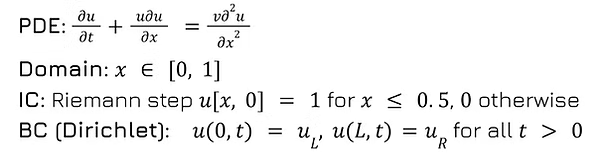

The Burgers’ equation is a canonical nonlinear PDE that blends convective nonlinearity with viscous diffusion in a single scalar (1‑D) field. By stripping away the pressure term and incompressibility constraint of the full Navier–Stokes (NS) system, it retains the hardest parts of fluid motion, non‑linear steepening and viscous smoothing, while remaining analytically tractable. This makes Burgers an ideal entry‑level CFD benchmark and a low‑resource proving ground for quantum solvers. Because Burgers keeps the hard nonlinear/viscous core of NS, but omits pressure projection, any quantum‑classical splitting, Trotterisation, or tensor‑compression validated here will transfer directly to NS once a pressure solver is added. Resource counts obtained on Burgers therefore provide a lower‑bound estimate for full‑scale Navier–Stokes workloads.

In the QTN (Quantum Tensor Network) approach, we represent the 1D velocity field of a fluid (a vector of numbers over space) in a compressed form using a Matrix Product State (MPS) — a structure from quantum physics used to efficiently describe high-dimensional vectors.
Instead of storing the full velocity field as a long vector, we break it into small matrices (tensors) that are multiplied together — this can save space and allow structured updates.


In [3]:
import numpy as np
import sympy as sp

sp.init_printing(use_latex=True)

x, nu, t = sp.symbols('x nu t')
phi = (sp.exp(-(x-4*t)**2/(4*nu*(t+1))) + (sp.exp(-(x-4*t-2*sp.pi)**2/(4*nu*(t+1)))))
phi

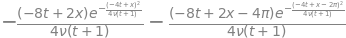

In [5]:
phiprime = phi.diff(x)
phiprime

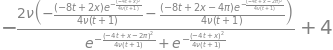

In [8]:
from sympy.utilities.lambdify import lambdify

u = -2*nu*(phiprime/phi) + 4
u

In [10]:
ufunc = lambdify((t,x,nu),u)
ufunc(1,4,3)

BURGERS' EQUATION (CLASSICAL)

In [20]:
from matplotlib import pyplot as plt

nx = 401
nt = 100
dx = 2*np.pi/(nx-1)

nu = 0.07
dt = dx*nu

x = np.linspace(0,2*np.pi, nx)
un = np.zeros(nx)

t = 0

u = np.asarray([ufunc(t,x0,nu) for x0 in x])
u[-1]

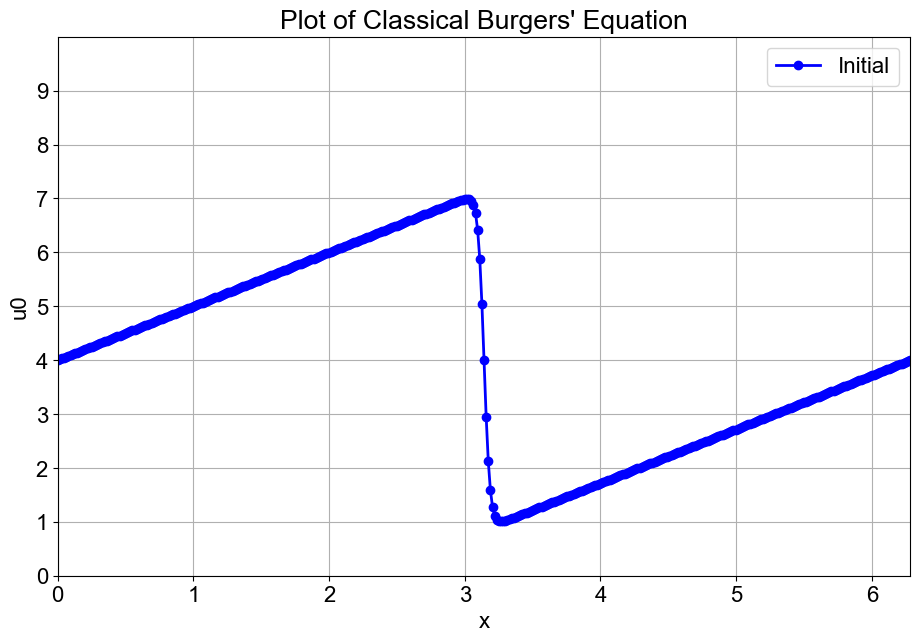

In [22]:
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 16

plt.figure(figsize=(11,7),dpi=100)
plt.plot(x,u,color='blue',linewidth=2,marker='o',label='Initial')

plt.xlabel('x', fontsize=16)
plt.ylabel('u0', fontsize=16)

plt.title("Plot of Classical Burgers' Equation")
plt.grid(True)

plt.legend(loc='upper right')

plt.xlim([0,2*np.pi])
plt.ylim([0,10])

plt.xticks(np.arange(0,2*np.pi,1))
plt.yticks(np.arange(0,10,1))

plt.show()


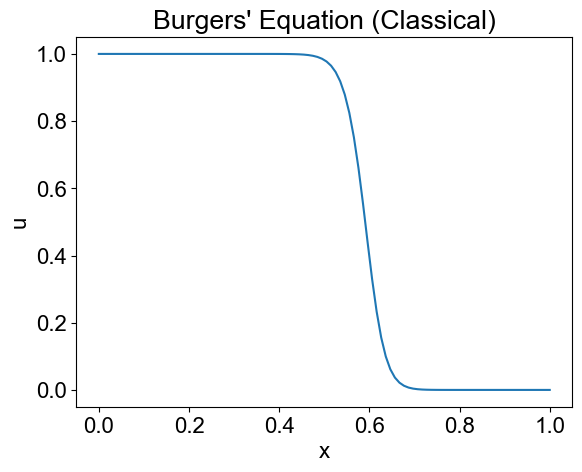

In [39]:
#Classical 1-D Burgers' Equation 

import numpy as np
import matplotlib.pyplot as plt

nx = 100
dx = 1.0/nx
dt = 0.001
nu = 0.01
nt = 200

#Shock Tube Condition
u = np.zeros(nx)
u[:nx//2] = 1.0

for n in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu * dt/dx**2 * (un[2:] - 2*un[1:-1] + un[:-2])
    
plt.plot(np.linspace(0,1,nx),u)
plt.title("Burgers' Equation (Classical)")
plt.xlabel("x")
plt.ylabel("u")
plt.show()